## Assembler des circuits

### Registres

In [39]:
from qiskit import QuantumRegister, ClassicalRegister

entrees = QuantumRegister  (4, 'entrees')
sorties = ClassicalRegister(4, 'sorties')

### Milieu

In [40]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(entrees, sorties)
circuit.barrier(range(entrees.size))
circuit.cx(2, 3)
circuit.draw()

░      
entrees_0: ─░──────
            ░      
entrees_1: ─░──────
            ░      
entrees_2: ─░───■──
            ░ ┌─┴─┐
entrees_3: ─░─┤ X ├
            ░ └───┘
sorties: 4/════════

### Fragments

In [41]:
hadamard = QuantumCircuit(entrees.size)
hadamard.h(range(entrees.size-1))
hadamard.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘
q_3: ─────

In [5]:
mesure = QuantumCircuit(entrees.size, sorties.size)
mesure.measure_all(add_bits=False)
mesure.draw()

░ ┌─┐         
q_0: ─░─┤M├─────────
      ░ └╥┘┌─┐      
q_1: ─░──╫─┤M├──────
      ░  ║ └╥┘┌─┐   
q_2: ─░──╫──╫─┤M├───
      ░  ║  ║ └╥┘┌─┐
q_3: ─░──╫──╫──╫─┤M├
      ░  ║  ║  ║ └╥┘
c: 4/════╩══╩══╩══╩═
         0  1  2  3

### Assemblage

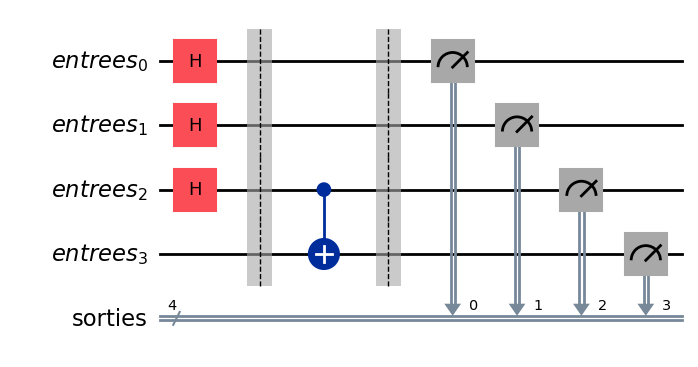

In [42]:
circuit = circuit.compose(hadamard, front=True).compose(mesure)
circuit.draw('mpl')

### Simulation partielle

In [45]:
from qiskit import transpile
from qiskit_aer import AerSimulator, Aer

back_end = Aer.get_backend('statevector_simulator')
circ = transpile(circuit,back_end)
result = back_end.run(circ,shots=256).result()
result

Result(backend_name='statevector_simulator', backend_version='0.13.3', qobj_id='', job_id='8d3c93ef-e7ae-4175-95d6-322787cd5e9b', success=True, results=[ExperimentResult(shots=256, success=True, meas_level=2, data=ExperimentResultData(counts={'0xc': 31, '0xd': 38, '0xf': 30, '0x1': 39, '0xe': 37, '0x3': 26, '0x2': 29, '0x0': 26}, statevector=Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))), header=QobjExperimentHeader(creg_sizes=[['sorties', 4]], global_phase=0.0, memory_slots=4, n_qubits=4, name='circuit-188', qreg_sizes=[['entrees', 4]], metadata={}), status=DONE, seed_simulator=4198663437, metadata={'time_taken': 0.004006326, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 4, 'active_input_qubits': [0

### Visualisation

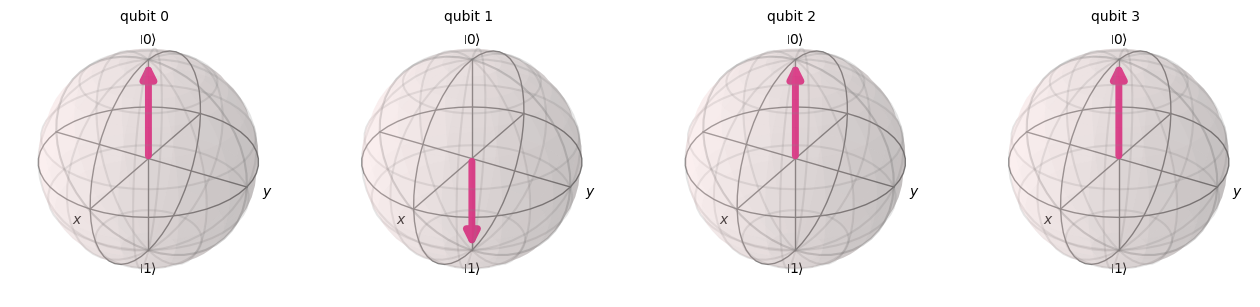

In [46]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(result.get_statevector(circuit))